init

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = './data/global-energy-substitution.csv'
energy_percentage = pd.read_csv(file_path)

energy_percentage.head()

,Entity,Code,Year,"Other renewables (TWh, substituted energy)","Biofuels (TWh, substituted energy)","Solar (TWh, substituted energy)","Wind (TWh, substituted energy)","Hydropower (TWh, substituted energy)","Nuclear (TWh, substituted energy)","Gas (TWh, substituted energy)","Oil (TWh, substituted energy)","Coal (TWh, substituted energy)","Traditional biomass (TWh, substituted energy)"
0,World,OWID_WRL,1800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,5556
1,World,OWID_WRL,1810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,5833
2,World,OWID_WRL,1820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0,6111
3,World,OWID_WRL,1830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.0,6389
4,World,OWID_WRL,1840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356.0,6944


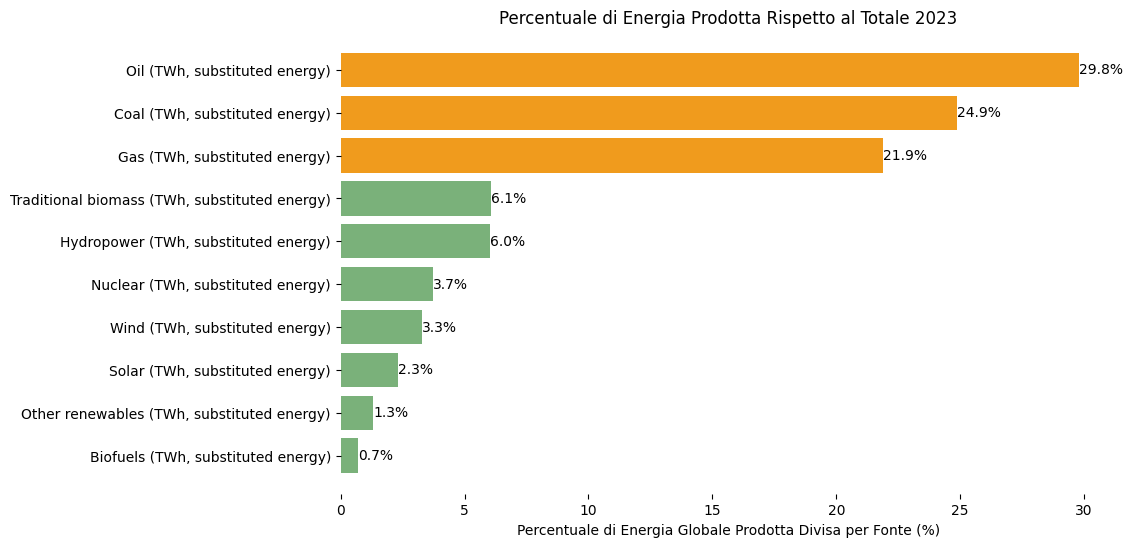

In [11]:
latest_year = energy_percentage['Year'].max()
latest_data = energy_percentage[energy_percentage['Year'] == latest_year]

energy_sources = latest_data.drop(columns=['Entity', 'Code', 'Year'])
total_energy = energy_sources.sum(axis=1).values[0]

energy_percentage = (energy_sources / total_energy) * 100

labels = energy_percentage.columns
values = energy_percentage.values.flatten()

df = pd.DataFrame({'Label': labels, 'Value': values})

df = df.sort_values(by='Value', ascending=True)

colors = ['#F09B1D' if label in ['Oil (TWh, substituted energy)', 'Coal (TWh, substituted energy)', 'Gas (TWh, substituted energy)'] else '#7AB17A' for label in df['Label']]

plt.figure(figsize=(10, 6))
plt.barh(df['Label'], df['Value'], color=colors)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.xlabel(f'Percentuale di Energia Globale Prodotta Divisa per Fonte (%)')
plt.title(f'Percentuale di Energia Prodotta Rispetto al Totale {latest_year}')

for index, value in enumerate(df['Value']):
    plt.text(value, index, f'{value:.1f}%', va='center')

plt.show()
